## Riksantikvarieämbetet RAÄ - kulturarvsdata - UGC
version 1.3 

get UGC data [see API](http://ugc.kulturarvsdata.se/UGC-hub/api/documentation)
and understand how they link Europeana etc... 

* this [notebook](https://github.com/salgo60/open-data-examples/blob/master/Riksantikvarie%C3%A4mbetet%20RA%C3%84%20UGC.ipynb)
* [blogpost](https://minancestry.blogspot.com/2020/06/check-status-kulturnav-raa.html)

**usage of UGC started in 2012 to get user involvement**.... has it been a success or just another try.

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2022-12-31 13:00:00.573753


In [2]:
# get all records UGC just sends 200 records --> we need to loop and I guess max3000000 records
import urllib3, json
import pandas as pd  
from tqdm.notebook import trange 
http = urllib3.PoolManager()
maxCount=1000
urlbase = "http://ugc.kulturarvsdata.se/UGC-hub/api?method=retrieve&scope=all&maxCount=" + str(maxCount) + "&objectUri=all&format=json&selectFrom="
pd.set_option("display.max.columns", None) 
dftot = pd.DataFrame()
maxCount=1000
for i in trange(1,3000000,maxCount):
    
    url = urlbase + str(i)
    r = http.request('GET', url)
    data = json.loads(r.data)
    #print(data["response"]["relations"])
    try:
        df = pd.json_normalize(data["response"]["relations"])
        #dftot = dftot.append(pd.DataFrame(data["response"]["relations"]),sort=False)
        #dftot = pd.concat([dftot, pd.DataFrame.from_records([{ 'relation': data["response"]["relations"]}])], ignore_index=True)
        dftot = pd.concat([dftot, df])
    except:
        pass
    
#print(dftot.head())

#print(dftot.userName.unique()) 


  0%|          | 0/3000 [00:00<?, ?it/s]

In [3]:
print(dftot.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   relationType     object
 1   id               int64 
 2   objectUri        object
 3   userName         object
 4   relatedUri       object
 5   applicationName  object
 6   createDate       object
 7   comment          object
 8   updateDate       object
 9   tag              object
dtypes: int64(1), object(9)
memory usage: 226.9+ MB
None


In [4]:
print(dftot.applicationName)

0      Wikimedia Commons Harvester
1      Wikimedia Commons Harvester
2      Wikimedia Commons Harvester
3      Wikimedia Commons Harvester
4      Wikimedia Commons Harvester
                  ...             
162                        Kringla
163                        Kringla
164                        Kringla
165                        Kringla
166                        Kringla
Name: applicationName, Length: 2704167, dtype: object


In [5]:
dftot.relationType.unique()

array(['isVisualizedBy', 'sameAsWikipedia', 'visualizes', 'isDescribedBy',
       'sameAs', 'isDescribedByWikipedia', 'photographer', 'author',
       'isRelatedTo', 'hasPart', 'isPartOf', 'has_created', 'describes',
       nan], dtype=object)

### UGC  
11 relationstyper jmf Wikidata > [7650 egenskaper](https://w.wiki/DYS) dvs. om målet är att "användare kan bidra själv med semantiska länkar" så känns det bättre om användaren gör det hos Wikidata där det finns stöd att även ange [semantiska länkar i bilderna](https://www.youtube.com/watch?v=lmWmMIuCJVM&t=158s) ?!?!? 

In [6]:
dftot["relationType"].value_counts()

sameAs                    2204431
isRelatedTo                216319
isVisualizedBy             150483
author                      54505
isDescribedBy               35755
photographer                16920
sameAsWikipedia             12794
visualizes                  11641
hasPart                       659
isPartOf                      454
isDescribedByWikipedia        199
has_created                     3
describes                       2
Name: relationType, dtype: int64

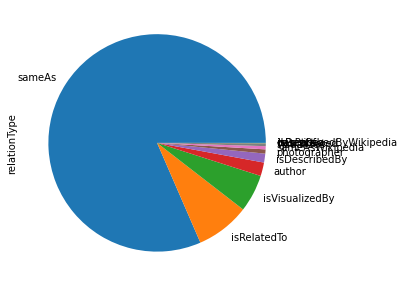

In [7]:
%matplotlib inline  
import matplotlib.pyplot as plt  
plot = dftot["relationType"].value_counts().plot.pie(y='counts', figsize=(5, 5))  
plt.show()

In [8]:
# objekt med relatedUri borde finnas med Wikicommon objektet som sedan borde 
# peka tillbaka till K-samsök ? 
dftot.head(30)

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,comment,updateDate,tag
0,isVisualizedBy,57818722,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
1,isVisualizedBy,57818721,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
2,isVisualizedBy,57818720,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
3,isVisualizedBy,57818719,http://kulturarvsdata.se/arme/object/AM140131,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
4,isVisualizedBy,57818718,http://kulturarvsdata.se/arme/object/AM140131,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
5,isVisualizedBy,57818717,http://kulturarvsdata.se/arme/object/AM140131,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
6,isVisualizedBy,57818716,http://kulturarvsdata.se/arme/object/AM140131,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
7,isVisualizedBy,57818715,http://kulturarvsdata.se/arme/object/AM140131,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
8,isVisualizedBy,57818714,http://kulturarvsdata.se/arme/object/AM128283,WikimediaC,http://commons.wikimedia.org/wiki/File:Lastter...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
9,isVisualizedBy,57818713,http://kulturarvsdata.se/arme/object/AM128283,WikimediaC,http://commons.wikimedia.org/wiki/File:Lastter...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN


In [9]:
dftot.tail(30)

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,comment,updateDate,tag
137,isVisualizedBy,674,http://kulturarvsdata.se/SMVK-EM/objekt/1019943,Magnus Johansson,http://kulturarvsdata.se/SMVK-VKM/fotografi/13...,Kringla,2012-03-13,NaN,NaN,NaN
138,sameAs,673,http://kulturarvsdata.se/SMVK-EM/fotografi/146...,Magnus Johansson,http://kulturarvsdata.se/SMVK-VKM/fotografi/18...,Kringla,2012-03-07,NaN,NaN,NaN
139,sameAs,672,http://kulturarvsdata.se/SMVK-VKM/fotografi/18...,Magnus Johansson,http://kulturarvsdata.se/SMVK-EM/fotografi/146...,Kringla,2012-03-07,NaN,NaN,NaN
140,isVisualizedBy,670,http://kulturarvsdata.se/SMVK-EM/objekt/1013984,Magnus Johansson,http://kulturarvsdata.se/SMVK-VKM/fotografi/13...,Kringla,2012-02-28,NaN,NaN,NaN
141,isDescribedBy,669,http://kulturarvsdata.se/raa/bbr/21400000307373,David Haskiya,http://kulturarvsdata.se/arkitekturmuseet/arkd...,Kringla,2012-02-26,NaN,NaN,NaN
142,hasPart,668,http://kulturarvsdata.se/raa/bbr/21400000307373,David Haskiya,http://kulturarvsdata.se/arkitekturmuseet/arkd...,Kringla,2012-02-26,NaN,NaN,NaN
143,isDescribedBy,667,http://kulturarvsdata.se/raa/bbr/21400000307373,David Haskiya,http://kulturarvsdata.se/arkitekturmuseet/arkd...,Kringla,2012-02-26,NaN,NaN,NaN
144,isVisualizedBy,666,http://kulturarvsdata.se/raa/bbr/21400000307373,David Haskiya,http://kulturarvsdata.se/arkitekturmuseet/arkd...,Kringla,2012-02-26,NaN,NaN,NaN
145,isVisualizedBy,665,http://kulturarvsdata.se/raa/bbr/21400000440209,David Haskiya,http://kulturarvsdata.se/raa/dokumentation/a6d...,Kringla,2012-02-26,NaN,NaN,NaN
146,isVisualizedBy,664,http://kulturarvsdata.se/raa/bbr/21400000440209,David Haskiya,http://kulturarvsdata.se/raa/dokumentation/711...,Kringla,2012-02-26,NaN,NaN,NaN


In [10]:
isCommon = dftot[dftot['relatedUri'].str.contains("commons.wikimedia.org", na=False)]
isCommon.head()

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,comment,updateDate,tag
0,isVisualizedBy,57818722,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
1,isVisualizedBy,57818721,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
2,isVisualizedBy,57818720,http://kulturarvsdata.se/arme/object/AM140132,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
3,isVisualizedBy,57818719,http://kulturarvsdata.se/arme/object/AM140131,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN
4,isVisualizedBy,57818718,http://kulturarvsdata.se/arme/object/AM140131,WikimediaC,http://commons.wikimedia.org/wiki/File:Pansarv...,Wikimedia Commons Harvester,2022-12-28,NaN,NaN,NaN


In [11]:
isCommon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230856 entries, 0 to 37
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   relationType     230856 non-null  object
 1   id               230856 non-null  int64 
 2   objectUri        230856 non-null  object
 3   userName         230856 non-null  object
 4   relatedUri       230856 non-null  object
 5   applicationName  230856 non-null  object
 6   createDate       230856 non-null  object
 7   comment          71 non-null      object
 8   updateDate       32 non-null      object
 9   tag              0 non-null       object
dtypes: int64(1), object(9)
memory usage: 19.4+ MB


In [12]:
isCommon.relationType.unique()

array(['isVisualizedBy', 'isRelatedTo', 'sameAs'], dtype=object)

In [13]:
isCommon["relationType"].value_counts()

isVisualizedBy    149393
sameAs             81346
isRelatedTo          117
Name: relationType, dtype: int64

In [14]:
isCommon["userName"].value_counts() 

WikimediaC                  148795
Albin Larsson                81346
Bernt Fransson                 196
carwash                        194
Larissa                         52
Holger.Ellgaard                 49
Magnus Johansson                38
Adlitam                         27
Örjan Mattsson                  24
blajo                           19
Lasse Lundqvist                 16
Åsa Johansson                   10
Henrik Summanen                  9
Ulf Kjellsson                    7
DavidH                           7
jssfrk                           6
Eva Vedin                        5
Jomal                            5
Johan                            4
salgo60                          4
JohanJ                           3
Tekniska museet                  3
Dan Albert Koehl                 3
Tore Danielsson                  3
Magnus Sälgö                     3
hamrelius                        2
AryDane                          2
kallep                           2
Meretseger          

In [15]:
isCommon.tail(100)

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,comment,updateDate,tag
154,isVisualizedBy,1669673,http://kulturarvsdata.se/raa/lamning/065f1628-...,Adlitam,https://commons.wikimedia.org/wiki/File:Skepps...,Kringla,2013-12-06,NaN,NaN,NaN
169,isVisualizedBy,1669655,http://kulturarvsdata.se/raa/lamning/7ea73cbb-...,Adlitam,https://commons.wikimedia.org/wiki/File:Algbac...,Kringla,2013-12-06,NaN,NaN,NaN
171,isVisualizedBy,1669653,http://kulturarvsdata.se/LSH/agents/9534,David Haskiya,http://commons.wikimedia.org/wiki/File:Gustave...,Kringla,2013-12-05,NaN,NaN,NaN
172,isVisualizedBy,1669652,http://kulturarvsdata.se/LSH/agents/9534,David Haskiya,http://commons.wikimedia.org/wiki/File:Gustav_...,Kringla,2013-12-05,NaN,NaN,NaN
204,isVisualizedBy,1498059,http://kulturarvsdata.se/raa/lamning/ac61481c-...,blajo,https://commons.wikimedia.org/wiki/File:Kvissl...,Kringla,2013-11-09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
965,isVisualizedBy,112887,http://kulturarvsdata.se/raa/bbrp/21620000000042,Jomal,http://commons.wikimedia.org/wiki/File:Osvald_...,Kringla,2012-12-12,NaN,NaN,NaN
966,isVisualizedBy,112886,http://kulturarvsdata.se/raa/bbrp/21600000001859,Jomal,http://commons.wikimedia.org/wiki/File:Boberg_...,Kringla,2012-12-12,NaN,NaN,NaN
29,isVisualizedBy,94074,http://kulturarvsdata.se/raa/bbrp/21600000013187,Lasse Lundqvist,http://commons.wikimedia.org/wiki/File%3ANicod...,Kringla,2012-12-06,NaN,NaN,NaN
34,isVisualizedBy,19379,http://kulturarvsdata.se/raa/bbrp/21600000003542,Henrik Summanen,http://commons.wikimedia.org/wiki/File:Gunnar_...,Kringla,2012-11-12,NaN,NaN,NaN


## [Dataroundtrip Wikicommon <-> Kulturarvsdata](#dataroundtrip) 
se även tankar om [Digitaltmuseum dataroundtrip](https://minancestry.blogspot.com/2020/06/draft-kulturnav.html#Dataroundtrip) och [blogpost](https://minancestry.blogspot.com/2020/06/check-status-kulturnav-raa.html)

Skall dataroundtrip fungera behöver vi koppla ihop bilderna så att Wikicommons vet om kulturarvsdata och vice versa

id 1079458  

http://ugc.kulturarvsdata.se/UGC-hub/api?method=retrieve&objectUri=all&contentId=1079458&scope=single  
 
``` 
<response>
 <apiVersion>1.0</apiVersion>
 <relations>
  <relationType>isVisualizedBy</relationType>
  <relatedUri>https://commons.wikimedia.org/wiki/File:Skeppshamns_kapell,_Tyndero_2006-02-27.jpg</relatedUri>
  <tagValue/>
  <coordinateValue/>
  <commentValue/>
  <imageUrl/>
  <id>1079458</id>
  <uri>http://kulturarvsdata.se/raa/kmb/16000200045362</uri>
  <userName>blajo</userName>
  <applicationName>Kringla</applicationName>
  <createDate>2013-09-14</createDate>
  <updateDate/>
 </relations>
</response> 
```
-->   [File:Skeppshamns_kapell,_Tyndero_2006-02-27.jpg](https://commons.wikimedia.org/wiki/File:Skeppshamns_kapell,_Tyndero_2006-02-27.jpg)  
1. används i Wikidata [Q30313619](https://www.wikidata.org/wiki/Q30313619)
1. Wikicommon [M723463](https://commons.wikimedia.org/wiki/Special:EntityData/M723463.json) 
```
{
   entities: {
   M723463: {
   pageid: 723463,
   ns: 6,
   title: "File:Skeppshamns kapell, Tyndero 2006-02-27.jpg",
   lastrevid: 427376612,
   modified: "2020-06-18T20:24:28Z",
   type: "mediainfo",
   id: "M723463",
   labels: { },
   descriptions: { },
   statements: {
      P180: [
          {
             mainsnak: {
                snaktype: "value",
                property: "P180",
                datavalue: {
                   value: {
                      entity-type: "item",
                      numeric-id: 30313619,
                      id: "Q30313619"
                   },
                   type: "wikibase-entityid"
                }
              },
              type: "statement",
              id: "M723463$C3F19032-D57A-4208-B967-0F4C0C8D9E3D",
              rank: "normal"
           }
        ]
     }
    }
  }
}
``` 

### Wikicommons bilden bör peka tillbaka till K-samsök URI  
K-samsök URI = [Wikidata Property 1260](https://www.wikidata.org/wiki/Property:P1260) 

==> **Ny Wikicommon** [M723463](https://commons.wikimedia.org/wiki/Special:EntityData/M723463.json) med länk ** [raa/kmb/16000200045362](http://kulturarvsdata.se/raa/kmb/16000200045362) ** 

```  
{
   entities: {
   M723463: {
   pageid: 723463,
   ns: 6,
   title: "File:Skeppshamns kapell, Tyndero 2006-02-27.jpg",
   lastrevid: 427376612,
   modified: "2020-06-18T20:24:28Z",
   type: "mediainfo",
   id: "M723463",
   labels: { },
   descriptions: { },
   statements: {
      P180: [
          {
             mainsnak: {
                snaktype: "value",
                property: "P180",
                datavalue: {
                   value: {
                      entity-type: "item",
                      numeric-id: 30313619,
                      id: "Q30313619"
                   },
                   type: "wikibase-entityid"
                }
              },
              type: "statement",
              id: "M723463$C3F19032-D57A-4208-B967-0F4C0C8D9E3D",
              rank: "normal"
           }
       ]. 
       P1260: [
          {
             mainsnak: {
               snaktype: "value",
               property: "P1260",
               datavalue: {        
                   value: "raa/kmb/16000200045362",
                   type: "string"
                 }
              },
              type: "statement",
              id: "M723463$5369f899-4667-be9a-f9ba-40d8b90dabcc",
              rank: "normal"
              }
         ]
     }
    }
  }
}
``` 



## Listar unika användare som bidragit


In [16]:
print(dftot.userName.unique())

['WikimediaC' 'Wikipedia' 'carwash' 'phi' 'Lasse Lundqvist' 'Magnus J'
 'AryDane' 'GS' 'Tekniska museet' 'Blublu' 'angid' 'Ulf Kjellsson'
 'Albin Larsson' 'Annelie.MHassby' 'kjellfredrik' 'bcjh' 'Nysvensk09'
 'Meretseger' 'garam0nd' 'Eric Luth (WMSE)' 'salgo60' 'JohanJ'
 'Åsa Larsson' 'Nixdorf' 'Boberger' 'Holger.Ellgaard' 'DavidH'
 'Bernt Fransson' 'kallep' 'Larissa' 'HLP' 'babben' 'Allivet' 'demithor'
 'Allvet' 'Jan Ainali' 'Anders Lindeberg-Lindvet' 'Magnus Sälgö'
 'andersthe' 'Little Gun' 'kringelkrok' 'Magnus Johansson'
 'Lennart T Olsson' 'tompahvall' 'Tore Danielsson' 'hamrelius' 'Julie'
 'Johan' 'nilsw' 'David Haskiya' 'filosofiedoktor' 'kalle' 'Adlitam'
 'Eva Vedin' 'Hammarkind' 'Work with Sounds' 'jssfrk' 'blajo'
 'Dan Albert Koehl' 'Wilhelm Lagercrantz' 'Tester Testersson' 'Sendelbach'
 'Johan Carlström' 'Anders Wennersten' 'Örjan Mattsson' 'carin'
 'Anders Olsson' 'paulinadevries' 'anna söderström' 'Kalle Johansson'
 'Sophie' 'henning' 'helenabjork' 'Kaysara' 'ekstahagar' '

In [17]:
usersActivity = dftot["userName"].value_counts() 
for i,v in dftot["userName"].value_counts().items():
    print(i,"\t",v)

Albin Larsson 	 2491686
WikimediaC 	 148795
carwash 	 49565
Wikipedia 	 11758
Jomal 	 604
Adlitam 	 338
Lasse Lundqvist 	 244
Bernt Fransson 	 196
Larissa 	 159
Magnus Johansson 	 100
Johan 	 93
Holger.Ellgaard 	 82
Tekniska museet 	 53
Eva Vedin 	 50
Allvet 	 40
blajo 	 30
jssfrk 	 27
Örjan Mattsson 	 24
DavidH 	 23
Jan Ainali 	 22
David Haskiya 	 18
Henrik Summanen 	 18
Åsa Johansson 	 16
Magnus J 	 16
Kicki Ericson 	 15
tompahvall 	 15
Ulf Kjellsson 	 15
salgo60 	 14
nilsw 	 9
Nixdorf 	 9
HLP 	 9
Allivet 	 8
Anders Lindeberg-Lindvet 	 6
Meretseger 	 6
Mikael Lindmark 	 5
Magnus Sälgö 	 5
andersthe 	 5
paulinadevries 	 5
Dan Albert Koehl 	 4
Tore Danielsson 	 4
bcjh 	 4
JohanJ 	 3
kalle 	 3
Little Gun 	 3
Sendelbach 	 3
carin 	 3
LA2 	 2
Wilhelm Lagercrantz 	 2
Johan Carlström 	 2
Work with Sounds 	 2
Hammarkind 	 2
Mjohansson2 	 2
Sophie 	 2
Åsa Larsson 	 2
helenabjork 	 2
Julie 	 2
hamrelius 	 2
AryDane 	 2
phi 	 2
kringelkrok 	 2
babben 	 2
kallep 	 2
Kaysara 	 1
ekstahagar 	 1
Bl

In [18]:
percentage = dftot["userName"].value_counts(normalize=True) 


In [19]:
# Top 5 med procent andel --> 96 % gissar jag gjorts med program
percentage[:5]

Albin Larsson    0.921425
WikimediaC       0.055024
carwash          0.018329
Wikipedia        0.004348
Jomal            0.000223
Name: userName, dtype: float64

/Users/magnus/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:1666: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


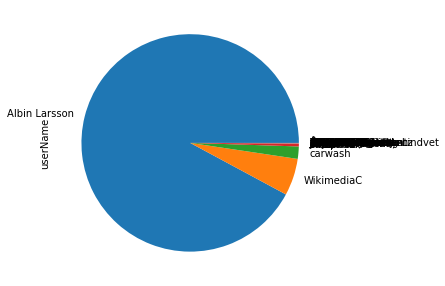

In [20]:
#Visa piechart 
plot = percentage.plot.pie(y='counts', figsize=(5, 5)) 
plt.show()

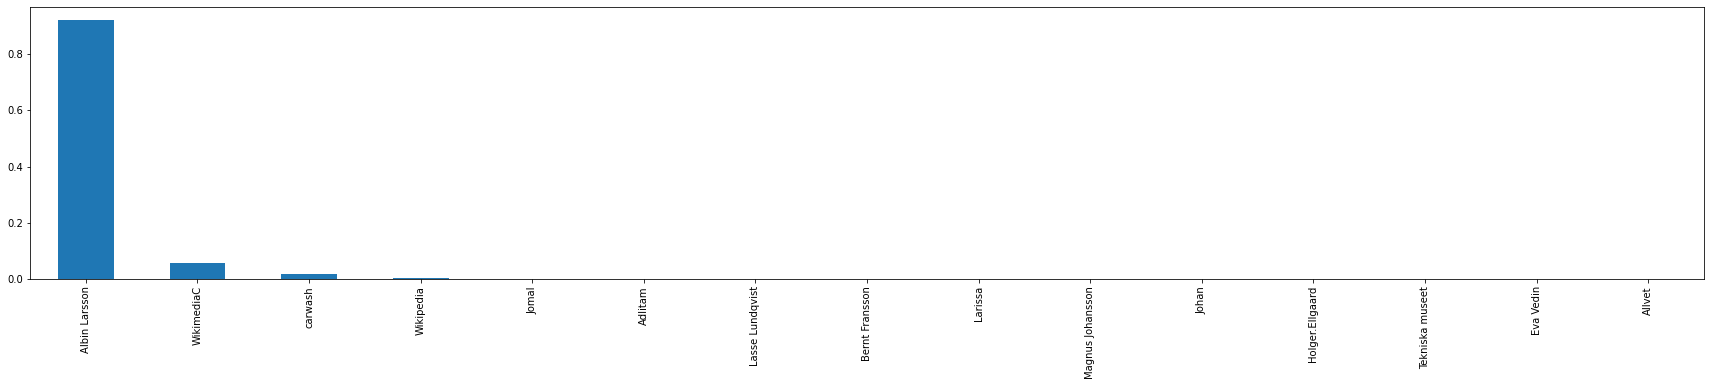

In [21]:
# Visa top 15 
plot2 = percentage[:15].plot.bar(y='counts', figsize=(30, 5))  
plt.show()

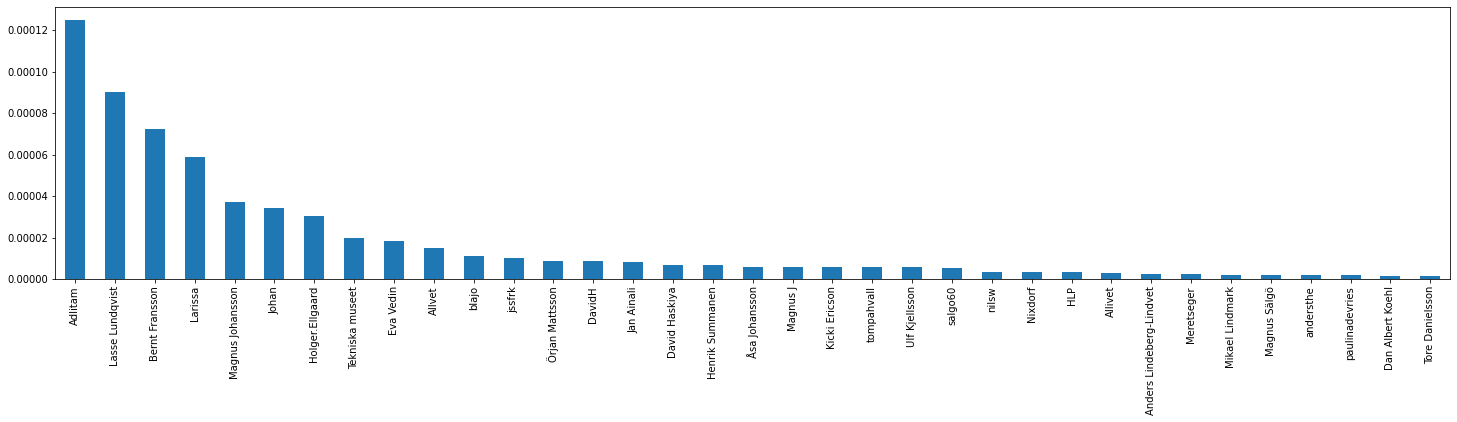

In [22]:
# Visa plats 6-40 
plot2 = percentage[5:40].plot.bar(y='counts', figsize=(25, 5)) 
plt.show()

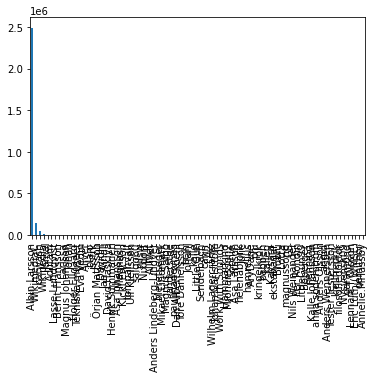

In [23]:

users = dftot["userName"].value_counts()

users.plot( kind = 'bar') 
plt.show()

In [24]:
dftot["createDate"].value_counts()

2018-11-28    1000004
2018-12-03     955563
2019-08-05     216202
2022-12-28     160553
2018-10-06     156895
               ...   
2019-11-18          1
2017-07-22          1
2021-03-09          1
2021-06-30          1
2014-12-05          1
Name: createDate, Length: 555, dtype: int64

In [25]:
dftot["createDate"].value_counts().sort_index(ascending=False)

2022-12-28    160553
2022-11-10         2
2022-09-19         3
2022-08-12         3
2022-07-11         2
               ...  
2012-02-09         1
2012-02-08         1
2012-02-07         1
2012-02-03         2
2012-02-02         2
Name: createDate, Length: 555, dtype: int64

In [26]:
# UGC äldsta värde är 2012-02-02 (samma år som WD skapades) och 
# mer än hälften av posterna skapades under en dag 2020-06-17 igår...?!?!?
dftot["createDate"].value_counts().sort_index()

2012-02-02         2
2012-02-03         2
2012-02-07         1
2012-02-08         1
2012-02-09         1
               ...  
2022-07-11         2
2022-08-12         3
2022-09-19         3
2022-11-10         2
2022-12-28    160553
Name: createDate, Length: 555, dtype: int64

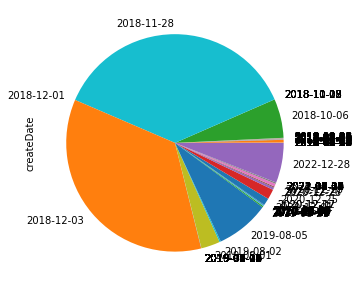

In [27]:
dfCreateDate = dftot["createDate"].value_counts().sort_index()
plotCreateDate = dfCreateDate.plot.pie(y='counts', figsize=(5, 5))  
plt.show()

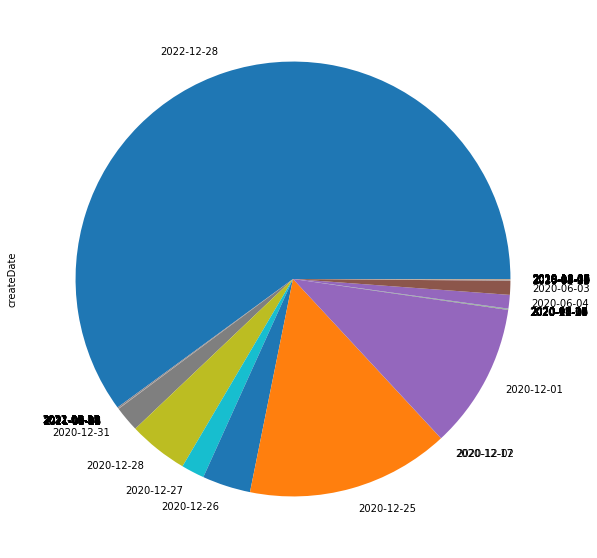

In [28]:
#Plot was hase been done the 100 latest  
plotCreateDate1 =   dfCreateDate.sort_index(ascending=False)[:100].plot.pie(y='counts', figsize=(10, 10))  
plt.show()

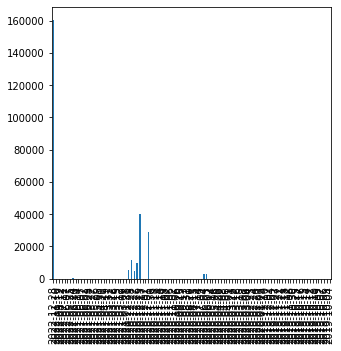

In [29]:
plotCreateDate1 =   dfCreateDate.sort_index(ascending=False)[:100].plot.bar(y='counts', figsize=(5, 5))  
plt.show()

In [30]:
dfCreateDate.sort_index(level=0) 

2012-02-02         2
2012-02-03         2
2012-02-07         1
2012-02-08         1
2012-02-09         1
               ...  
2022-07-11         2
2022-08-12         3
2022-09-19         3
2022-11-10         2
2022-12-28    160553
Name: createDate, Length: 555, dtype: int64

In [31]:
dfCreateDate.sort_index(level=0)

2012-02-02         2
2012-02-03         2
2012-02-07         1
2012-02-08         1
2012-02-09         1
               ...  
2022-07-11         2
2022-08-12         3
2022-09-19         3
2022-11-10         2
2022-12-28    160553
Name: createDate, Length: 555, dtype: int64

Plot piechart user

check links Europeana and if we have Linkeddata to agents ....

In [32]:
europeana = dftot['relatedUri'].str.contains("data.europeana.eu") 
europeana.describe()

count     2704165
unique          2
top          True
freq      1966045
Name: relatedUri, dtype: object

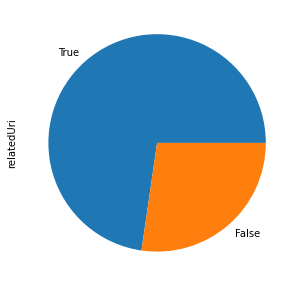

In [33]:
# 75 procent är länkar till Europeana dvs. troligen att samma objekt flyttats till Europeana 
# 
plotEuropeana = europeana.value_counts().plot.pie(y='counts', figsize=(5, 5))  

## Koll om det finns kopplingar länkad data dvs agent  
1966045 kopplingar verkar vara mellan objekt i kulturarvsdata till data.europeana.eu/item/  
Koppling Länkad data hittad dvs. samma som [Europeana Entity](https://www.wikidata.org/wiki/Property:P7704) samma som [Europeana Entity API](https://pro.europeana.eu/page/entity) verkar vara 46 stycken jmf Wikidata Europeana Entity > [160 000](https://www.wikidata.org/wiki/Property:P7704). Gissar att man pekar på uppladdade objekt... 

Dvs. det är i princip ingen semantik som tillförs utan mer info om att en bild flyttats. Europeana i sig är väldigt svagt semantiskt utan verkar bara sitta och gissa se [the sad story of Carl Larsson](https://minancestry.blogspot.com/2020/03/carl-larsson-who-is-that-sadly.html)

In [34]:
europeanaagent = dftot['relatedUri'].str.contains("agent","data.europeana.eu") 
europeanaagent2 = europeanaagent[europeanaagent == True] 
europeanaagent2.describe()

count       51
unique       1
top       True
freq        51
Name: relatedUri, dtype: object

In [35]:
pd.set_option('display.max_rows', None)

In [36]:
pd.options.display.max_rows

In [37]:
#Save session 
#import dill 
#dill.dump_session('ugc_env.db') 
# dill.load_session('ugc_env.db')

## Svensk runbibliografi

In [38]:
Svenskrunbibliografi = dftot[dftot['applicationName'].str.contains("Svensk runbibliografi",na=False)] 


In [39]:
Svenskrunbibliografi.relationType.unique()

array(['isDescribedBy'], dtype=object)

In [40]:
Svenskrunbibliografi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 15 to 835
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   relationType     10821 non-null  object
 1   id               10821 non-null  int64 
 2   objectUri        10821 non-null  object
 3   userName         10821 non-null  object
 4   relatedUri       10821 non-null  object
 5   applicationName  10821 non-null  object
 6   createDate       10821 non-null  object
 7   comment          10821 non-null  object
 8   updateDate       0 non-null      object
 9   tag              0 non-null      object
dtypes: int64(1), object(9)
memory usage: 929.9+ KB


In [41]:
Svenskrunbibliografi.userName.unique()

array(['carwash'], dtype=object)

In [42]:
Svenskrunbibliografi.createDate.unique()

array(['2014-10-17'], dtype=object)

In [69]:
Svenskrunbibliografi.comment.unique()

array(['Data från Samnordisk runtextdatabas och Svensk runbibliografi'],
      dtype=object)

In [71]:
#Svenskrunbibliografi.relatedUri.unique()

In [45]:
Svenskrunbibliografi.head(20)

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,comment,updateDate,tag
15,isDescribedBy,3855996,http://kulturarvsdata.se/raa/lamning/4b8d0857-...,carwash,http://libris.kb.se/bib/2839747,Svensk runbibliografi,2014-10-17,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
16,isDescribedBy,3855995,http://kulturarvsdata.se/raa/lamning/59430be1-...,carwash,http://libris.kb.se/bib/2839747,Svensk runbibliografi,2014-10-17,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
17,isDescribedBy,3855994,http://kulturarvsdata.se/raa/lamning/9521c087-...,carwash,http://libris.kb.se/bib/2839747,Svensk runbibliografi,2014-10-17,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
18,isDescribedBy,3855993,http://kulturarvsdata.se/raa/lamning/cbdc6e0f-...,carwash,http://libris.kb.se/bib/2839747,Svensk runbibliografi,2014-10-17,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
19,isDescribedBy,3855992,http://kulturarvsdata.se/raa/lamning/a9b02724-...,carwash,http://libris.kb.se/bib/2839747,Svensk runbibliografi,2014-10-17,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
20,isDescribedBy,3855991,http://kulturarvsdata.se/raa/lamning/35354cc0-...,carwash,http://libris.kb.se/bib/2839747,Svensk runbibliografi,2014-10-17,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
21,isDescribedBy,3855990,http://kulturarvsdata.se/raa/lamning/815a7ccd-...,carwash,http://libris.kb.se/bib/2804388,Svensk runbibliografi,2014-10-17,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
22,isDescribedBy,3855989,http://kulturarvsdata.se/raa/lamning/73e95cf8-...,carwash,http://libris.kb.se/bib/7644789,Svensk runbibliografi,2014-10-17,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
23,isDescribedBy,3855988,http://kulturarvsdata.se/raa/lamning/49c11fb8-...,carwash,http://libris.kb.se/bib/7644789,Svensk runbibliografi,2014-10-17,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN
24,isDescribedBy,3855987,http://kulturarvsdata.se/raa/lamning/4eadf213-...,carwash,http://libris.kb.se/bib/7644789,Svensk runbibliografi,2014-10-17,Data från Samnordisk runtextdatabas och Svensk...,NaN,NaN


Still using the old system not LIBRISXL and LIBRISXL seems not link back RAÄ....
* http://libris.kb.se/bib/2839747 correct is   
  * https://libris.kb.se/katalogisering/wd6wddh75pcpmxv ==> 
    * https://libris.kb.se/wd6wddh75pcpmxv/data.jsonld 

In [46]:
# get number of  libris items we reference  
libris = set() 
librisurl = "http://libris.kb.se/resource/bib/"
for index, row in Svenskrunbibliografi.iterrows():
    librisref = row['relatedUri'].split(".se/")[1].split("bib/")[1]
    libris.add(librisref)
    url = librisurl + librisref 
    # Looks like we get status 500 internal error from LIBRIS
    #try: 
        #print (url,librisref)
        #r = http.request('GET', url) 
        #print(r.headers) 
    #except : 
        #print ("\tError")


print ("Number of books linking: ",len(libris))
    

Number of books linking:  675


In [47]:
carwashCreated = dftot[dftot['userName'].str.contains("carwash",na=False)] 


In [48]:
carwashCreated.head(10)

,relationType,id,objectUri,userName,relatedUri,applicationName,createDate,comment,updateDate,tag
553,visualizes,56535152,http://kulturarvsdata.se/nbm/bildarkiv/48736,carwash,http://kulturarvsdata.se/raa/lamning/257068c5-...,Marcus Smith 1,2022-11-10,NaN,NaN,NaN
554,visualizes,56535151,http://kulturarvsdata.se/nbm/bildarkiv/48736,carwash,http://kulturarvsdata.se/uu/srdb/3a61c080-77fc...,Marcus Smith 1,2022-11-10,NaN,NaN,NaN
555,isDescribedBy,54934459,http://kulturarvsdata.se/uu/srdb/77c0edff-a092...,carwash,http://kulturarvsdata.se/raa/dokumentation/ed5...,Marcus Smith 1,2022-09-19,NaN,NaN,NaN
556,visualizes,54934458,http://kulturarvsdata.se/nomu/photo/NMA0048099,carwash,http://kulturarvsdata.se/uu/srdb/77c0edff-a092...,Marcus Smith 1,2022-09-19,NaN,NaN,NaN
557,visualizes,54934457,http://kulturarvsdata.se/nomu/photo/NMA0048098,carwash,http://kulturarvsdata.se/uu/srdb/77c0edff-a092...,Marcus Smith 1,2022-09-19,NaN,NaN,NaN
558,visualizes,53981609,http://kulturarvsdata.se/nomu/photo/NMA0027700,carwash,http://kulturarvsdata.se/raa/lamning/2c227064-...,Marcus Smith 1,2022-08-12,NaN,NaN,NaN
559,visualizes,53981608,http://kulturarvsdata.se/nomu/photo/NMA0027700,carwash,http://kulturarvsdata.se/raa/lamning/e7c3c375-...,Marcus Smith 1,2022-08-12,NaN,NaN,NaN
560,visualizes,53981607,http://kulturarvsdata.se/nomu/photo/NMA0027700,carwash,http://kulturarvsdata.se/uu/srdb/5c2f32d1-9b7f...,Marcus Smith 1,2022-08-12,NaN,NaN,NaN
561,visualizes,53191858,http://kulturarvsdata.se/S-OM/photo/OMCASU000196,carwash,http://kulturarvsdata.se/raa/lamning/100fe885-...,Marcus Smith 1,2022-07-11,NaN,NaN,NaN
562,visualizes,53191857,http://kulturarvsdata.se/S-OM/photo/OMCASU000196,carwash,http://kulturarvsdata.se/uu/srdb/1d234247-8a7e...,Marcus Smith 1,2022-07-11,NaN,NaN,NaN


In [49]:
carwashCreated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49565 entries, 553 to 111
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   relationType     49565 non-null  object
 1   id               49565 non-null  int64 
 2   objectUri        49565 non-null  object
 3   userName         49565 non-null  object
 4   relatedUri       49565 non-null  object
 5   applicationName  49565 non-null  object
 6   createDate       49565 non-null  object
 7   comment          39811 non-null  object
 8   updateDate       181 non-null    object
 9   tag              0 non-null      object
dtypes: int64(1), object(9)
memory usage: 4.2+ MB


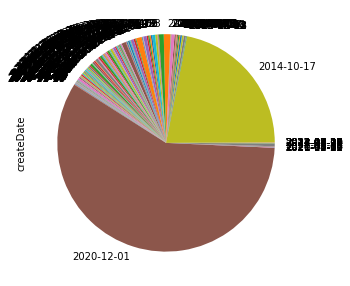

In [50]:
carwashCreatedDate = carwashCreated["createDate"].value_counts().sort_index()
plotcarwashCreateDate = carwashCreatedDate.plot.pie(y='counts', figsize=(5, 5))  
plt.show()

In [51]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [56]:
#sns.heatmap(dftot.isnull(), 
#            yticklabels=False, 
#            cbar=False, 
#            cmap='viridis')

In [53]:
#Show empty fields --> no coordinate values 
sns.heatmap(carwashCreated.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

<AxesSubplot:>

Error in callback <function flush_figures at 0x7fca8a5ebb80> (for post_execute):



KeyboardInterrupt



In [67]:
carwashCreatedDate[-10:]

2021-06-07     10
2021-06-14      8
2021-06-30      1
2022-05-24    214
2022-05-25     17
2022-06-07      6
2022-07-11      2
2022-08-12      3
2022-09-19      3
2022-11-10      2
Name: createDate, dtype: int64

In [58]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2022-12-31 16:53:15.624011
Time elapsed (hh:mm:ss.ms) 3:53:15.054698
